#### Lecture 4: Newton-Cotes integration

1. Implement trapezoid rule, Simpson's 1/3 rule, and Monte Carlo integration to estimate: 
$$ \int_0^{0.8} 0.2+25𝑥−200𝑥^2+675𝑥^3−900𝑥^4+400𝑥^5 dx $$

The exact value is 1.640533. Make a log-log plot of percent relative error vs. number of segments, where $n = 2^i, i \in [0, 11]$.

In [1]:
import numpy as np

def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

def trapezoid(f,a,b,n):
    x = np.linspace(a,b,n+1) # n segments, n+1 points between a and b
    I = (b-a)/(2*n) * (f(x[0]) + 2*np.sum(f(x[1:-1])) + f(x[-1]))
    return I

def simpson(f,a,b,n):
    x = np.linspace(a,b,n+1)
    I = (b-a)/(3*n) * (f(x[0]) + 4*np.sum(f(x[1:-1:2])) + 2*np.sum(f(x[2:-1:2])) + f(x[-1]))
    return I

def montecarlo(f,a,b,n):
    x = np.random.uniform(low=a, high=b, size=(1,n))
    I = (b - a)/n * np.sum(f(x))
    return I

Try out the functions using $n=100$:

In [2]:
trapezoid(f,0,0.8,100)

np.float64(1.640277344256001)

In [3]:
simpson(f,0,0.8,100)

np.float64(1.6405332896426676)

In [4]:
montecarlo(f,0,0.8,100)

np.float64(1.558834407170549)

We can compare to built-in `scipy.integrate.trapezoid` and `scipy.integrate.simpson`. These functions are designed to work with samples $y_i = f(x_i)$ rather than the function. Should match our answers above.

In [5]:
from scipy import integrate
a = 0
b = 0.8
n = 100
h = (b-a)/n
x = np.arange(a, b+h, h)
y = f(x)
integrate.trapezoid(y, x)

np.float64(1.6402773442560015)

In [7]:
integrate.simpson(y, x=x)

np.float64(1.6405332896426672)

Now let's create the log-log plot.

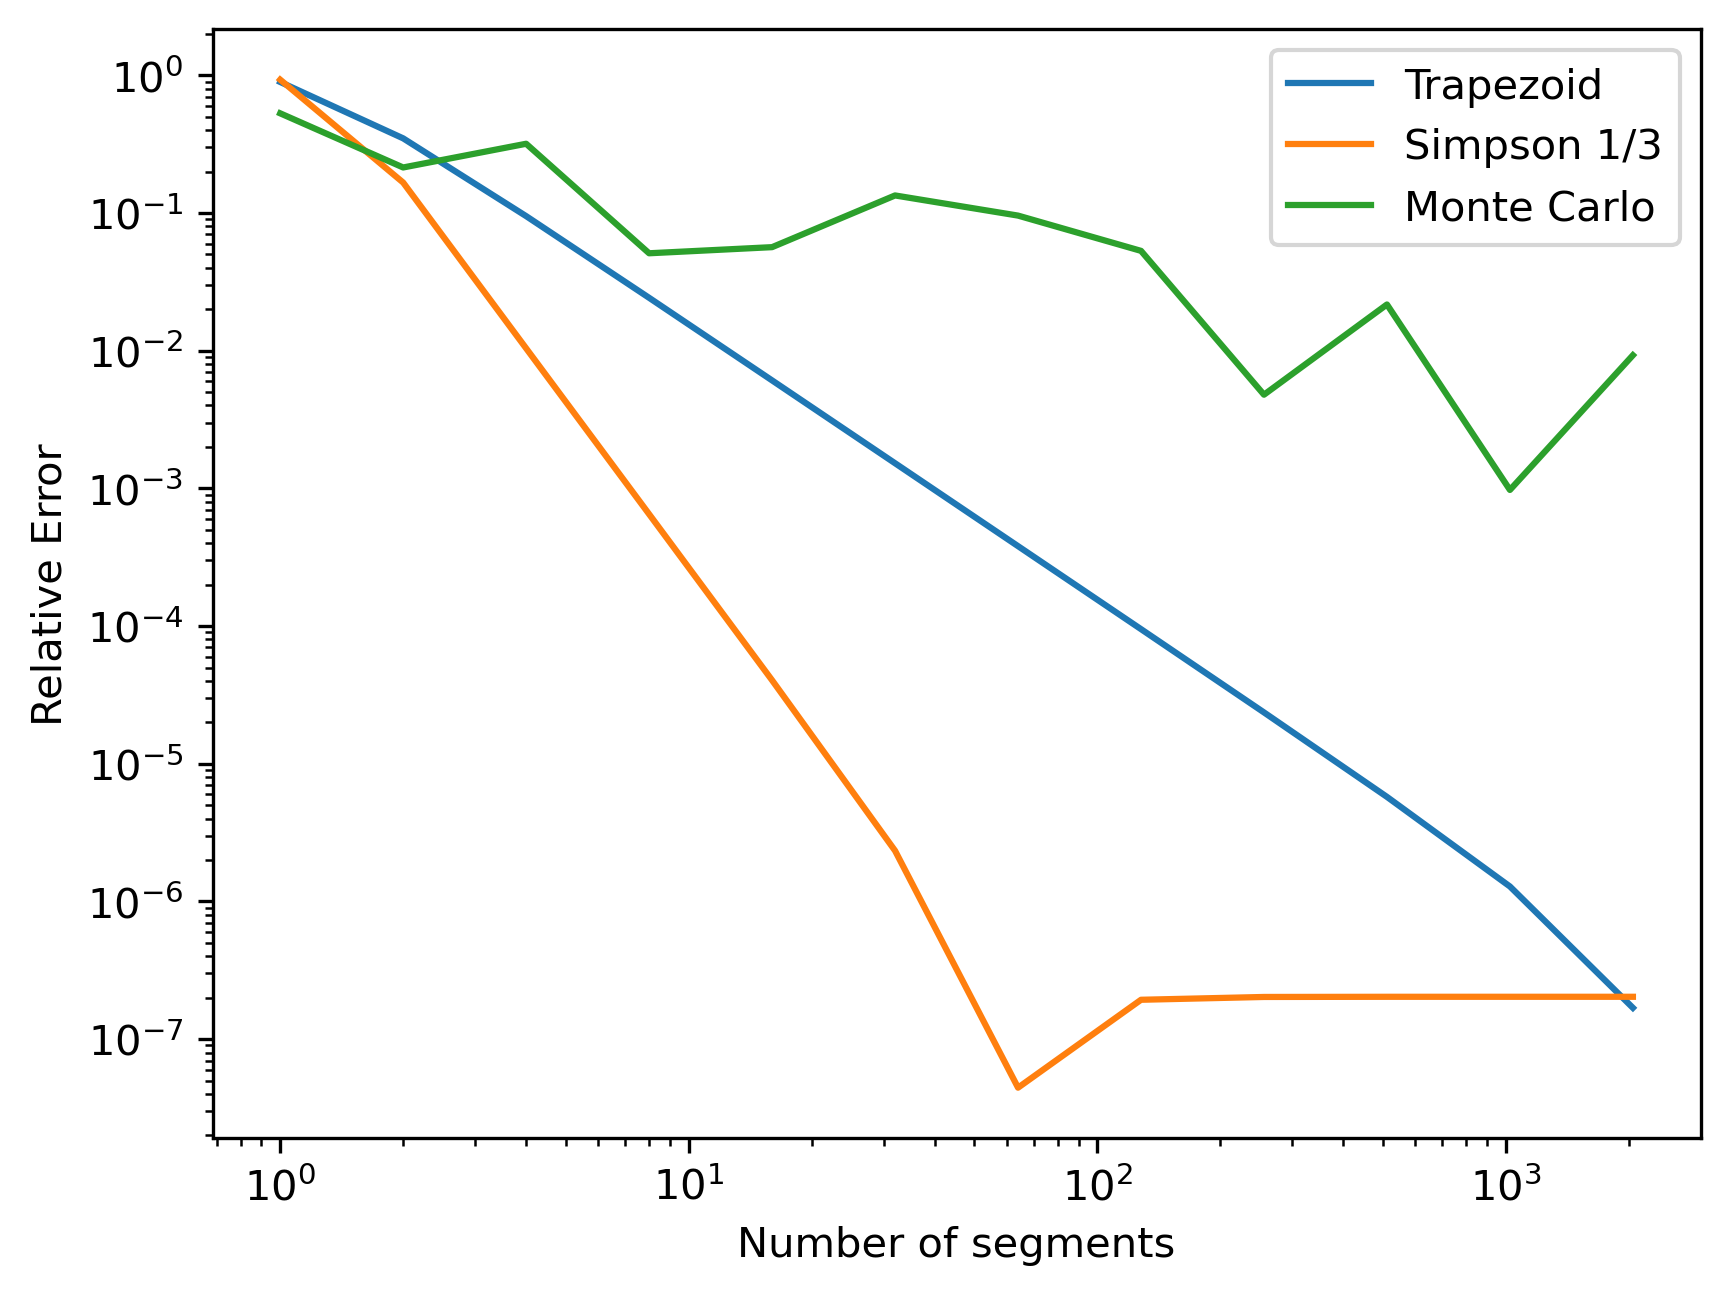

In [8]:
exact = 1.640533
n = 2 ** np.arange(12) # powers of 2 up to 1024
err1 = np.zeros(len(n))
err2 = np.zeros(len(n))
err3 = np.zeros(len(n))

for i in range(12): # i=0 to 11
    err1[i] = np.abs(trapezoid(f,a,b,n[i]) - exact) / exact
    err2[i] = np.abs(simpson(f,a,b,n[i]) - exact) / exact
    err3[i] = np.abs(montecarlo(f,a,b,n[i]) - exact) / exact

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.loglog(n, err1)
plt.loglog(n, err2)
plt.loglog(n, err3)
plt.ylabel('Relative Error')
plt.xlabel('Number of segments')
plt.legend(['Trapezoid', 'Simpson 1/3', 'Monte Carlo'])
plt.show()

Simpson's 1/3 rule is the most accurate of these, $O(h^4)$. On the left side of the plot, the error drops by about 4 orders of magnitude for each 1 order of magnitude increase in the number of segments - or, 1 order of magnitude decrease in the step size. Trapezoid rule is $O(h^2)$. The Monte Carlo convergence is mot monotonic due to random sampling, but on average the slope should be roughly $-1/2$, the method is $O(1 / \sqrt n)$.

Also notice Simpson's rule hits a precision limit (roundoff error) around $N=10^2$.

##### Problem 21.19
Given data for a cross-section of a river: distance $y$ from bank, depth $H$, and velocity $U$:

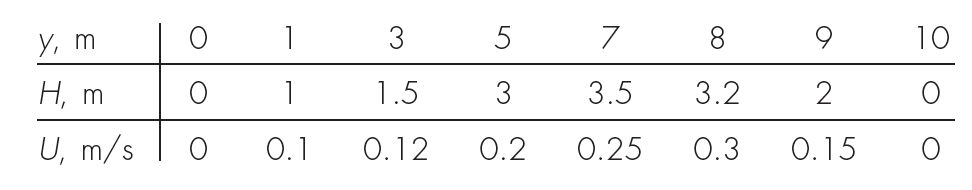

Use numerical integration to estimate the cross-sectional area and the flow rate:
$$ A = \int_0^y H(y)dy $$
$$ Q = \int_0^y H(y) U(y) dy $$

The points have unequal spacing, so we will have to use trapezoid rule. It would also be possible to use Simpson's rule for the subsets of points that have equal spacing. 

In [9]:
y = np.array([0, 1, 3, 5, 7, 8, 9, 10]); # distance from bank, m
H = np.array([0, 1, 1.5, 3, 3.5, 3.2, 2, 0]); # depth, m
U = np.array([0, 0.1, 0.12, 0.2, 0.25, 0.3, 0.15, 0]); # velocity, m/s

A = 0 # cross-section area (m^2)
Q = 0 # volumetric flowrate (m^3/s)

# trapezoid rule
for i in range(len(y)-1):
  h = y[i+1] - y[i] # unequal spacing
  A = A + (h/2) * (H[i] + H[i+1])
  Q = Q + (h/2) * (H[i] * U[i] + H[i+1] * U[i+1])

print('Cross-section Area: %0.2f m^2' % A)
print('Flowrate: %0.2f m^3/s' % Q)

Cross-section Area: 20.95 m^2
Flowrate: 4.28 m^3/s
